Analisi Unsupervised Learning del dataset "Customer Segmentation"

In [2]:
# Colab: Scaricare e caricare il dataset
!pip install kaggle
from google.colab import files
files.upload()  # Carica il file kaggle.json

# Configurare Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Scaricare il dataset
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python
!unzip customer-segmentation-tutorial-in-python.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 3.74MB/s]
Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


Preprocessing dei dati

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Caricare i dati
df = pd.read_csv('Mall_Customers.csv')

# Esplorare i dati
print(df.head())

# Preprocessing
# Rimuovere colonne non necessarie
df = df.drop(['CustomerID'], axis=1)

# Codificare colonne categoriche (es. Gender)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Standardizzare i dati
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Visualizzare i dati preprocessati
print(df_scaled[:5])

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
[[-1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [-1.12815215 -1.28103541 -1.73899919  1.19570407]
 [ 0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [ 0.88640526 -1.13750203 -1.70082976  1.04041783]
 [ 0.88640526 -0.56336851 -1.66266033 -0.39597992]]


Applicazione di k-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

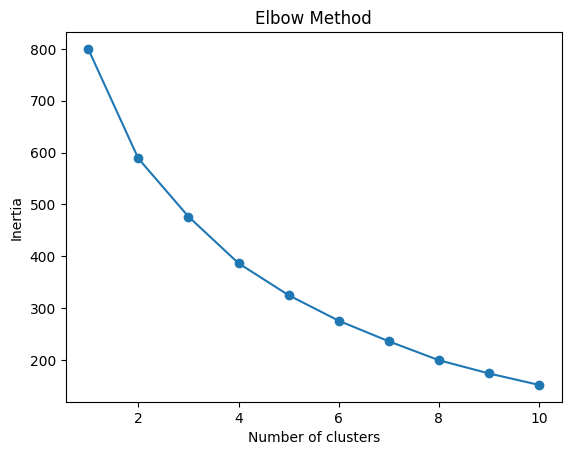

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       0   19                  15                      39        3
1       0   21                  15                      81        3
2       1   20                  16                       6        2
3       1   23                  16                      77        1
4       1   31                  17                      40        1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [4]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Metodo dell'Elbow per trovare il numero ottimale di cluster
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Visualizzare il metodo dell'Elbow
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Applicare K-means con il numero ottimale di cluster (ad esempio, 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_scaled)
labels = kmeans.labels_

# Aggiungere i cluster ai dati originali
df['Cluster'] = labels

# Visualizzare i primi 5 dati con il cluster assegnato
print(df.head())

Visualizzazione dei risultati

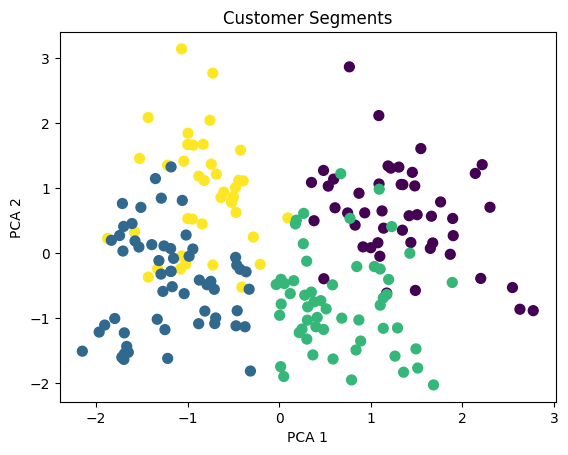

In [5]:
# Ridurre la dimensionalità per la visualizzazione
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Visualizzare i cluster
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, s=50, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Customer Segments')
plt.show()

In [6]:
# Calcolare le medie delle variabili per ciascun cluster
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

         Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                               
0           0.0  49.437500           62.416667               29.208333
1           1.0  28.438596           59.666667               67.684211
2           1.0  48.109091           58.818182               34.781818
3           0.0  28.250000           62.000000               71.675000


Profilazione dei Cluster

In [7]:
# Profilazione dei Cluster
for cluster in cluster_means.index:
    print(f"Cluster {cluster}:")
    print(f"  Genere: {'Principalmente uomini' if cluster_means.loc[cluster, 'Gender'] < 0.5 else 'Principalmente donne'}")
    print(f"  Età: Media di {cluster_means.loc[cluster, 'Age']:.1f} anni")
    print(f"  Reddito Annuale: Media di {cluster_means.loc[cluster, 'Annual Income (k$)']:.1f}k$")
    print(f"  Punteggio di Spesa: Media di {cluster_means.loc[cluster, 'Spending Score (1-100)']:.1f}")
    print()

Cluster 0:
  Genere: Principalmente uomini
  Età: Media di 49.4 anni
  Reddito Annuale: Media di 62.4k$
  Punteggio di Spesa: Media di 29.2

Cluster 1:
  Genere: Principalmente donne
  Età: Media di 28.4 anni
  Reddito Annuale: Media di 59.7k$
  Punteggio di Spesa: Media di 67.7

Cluster 2:
  Genere: Principalmente donne
  Età: Media di 48.1 anni
  Reddito Annuale: Media di 58.8k$
  Punteggio di Spesa: Media di 34.8

Cluster 3:
  Genere: Principalmente uomini
  Età: Media di 28.2 anni
  Reddito Annuale: Media di 62.0k$
  Punteggio di Spesa: Media di 71.7



Istogrammi delle variabili per cluster

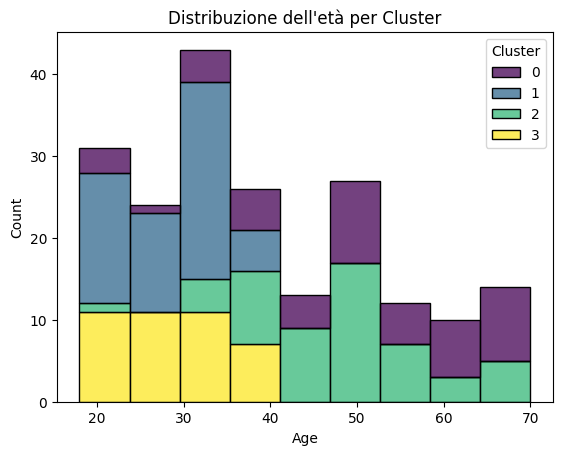

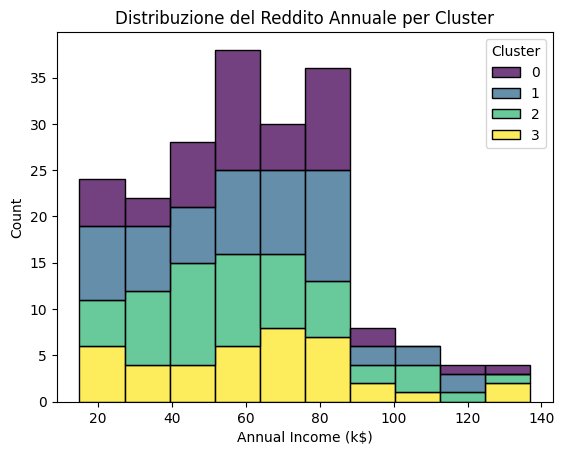

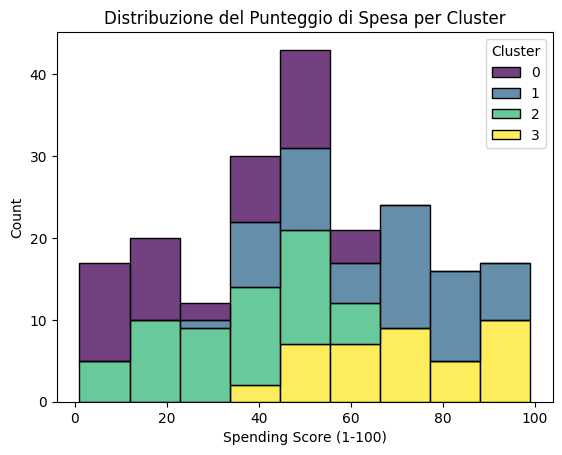

In [8]:
import seaborn as sns

# Istogramma dell'età per cluster
sns.histplot(data=df, x='Age', hue='Cluster', multiple='stack', palette='viridis')
plt.title('Distribuzione dell\'età per Cluster')
plt.show()

# Istogramma del reddito annuale per cluster
sns.histplot(data=df, x='Annual Income (k$)', hue='Cluster', multiple='stack', palette='viridis')
plt.title('Distribuzione del Reddito Annuale per Cluster')
plt.show()

# Istogramma del punteggio di spesa per cluster
sns.histplot(data=df, x='Spending Score (1-100)', hue='Cluster', multiple='stack', palette='viridis')
plt.title('Distribuzione del Punteggio di Spesa per Cluster')
plt.show()

Esempio di calcolo del Silhouette Score

In [9]:
from sklearn.metrics import silhouette_score

# Calcolare il Silhouette Score
sil_score = silhouette_score(df_scaled, labels)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.3016237438985174
